<h1>Problem Statement</h1>

<h4>To build a model to accurately classify a piece of news as REAL or FAKE.</h4>

<h4>Using sklearn, build a TfidfVectorizer on the provided dataset. Then, initialize a PassiveAggressive Classifier and fit the model. In the end, the accuracy score and the confusion matrix tell us how well our model fares.</h4>

<h2>Import required libraries</h2>

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Load Data From CSV File</h2>

In [96]:
news_data=pd.read_csv('news.csv')

In [97]:
news_data.head()


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


<h2>Data visualization and pre-processing
 </h2>

In [98]:
news_data.shape

(6335, 4)

In [99]:
news_data.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [100]:
news_data.count()


Unnamed: 0    6335
title         6335
text          6335
label         6335
dtype: int64

In [101]:
news_data['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [102]:
news_data.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

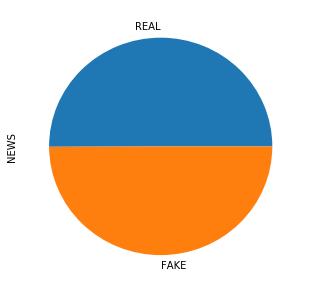

In [103]:
News_categories = ['REAL','FAKE']
series = pd.Series([3171,3164], 
                   index=News_categories, 
                   name='NEWS')

series.plot.pie(figsize=(5, 5))

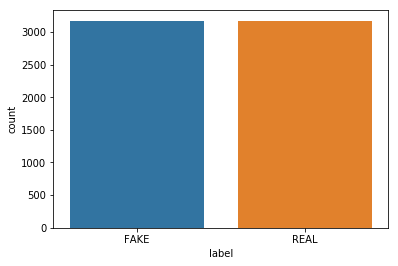

In [104]:
sns.countplot(news_data['label'],label = 'Count')

In [105]:
news_data['title'].value_counts()

OnPolitics | 's politics blog                                                                                                5
Get Ready For Civil Unrest: Survey Finds That Most Americans Are Concerned About Election Violence                           3
Michael Moore Owes Me $4.99                                                                                                  3
Hillary’s “Big Tent” is Obama’s “Grand Bargain” on Steroids                                                                  3
Schools All Over America Are Closing On Election Day Due To Fears Of Violence                                                2
There’s a good reason protesters at the University of Missouri didn’t want the media around                                  2
University of Missouri, please immediately fire employees who taunted media                                                  2
US abstains from UN vote calling for end to Cuban embargo                                                      

In [106]:
news_data['text'].value_counts()

Killing Obama administration rules, dismantling Obamacare and pushing through tax reform are on the early to-do list.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

<h2>Feature selection</h2>


In [63]:
X=news_data['text']
y=news_data['label']

<h2>Splitting the dataset into training data and testing data</h2>

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=1771)

<h2>Creation of TfidfVectorizer</h2>

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [68]:
tv = TfidfVectorizer(analyzer='word', stop_words = "english")


<h2>Fit data to Train data set /h2>

In [70]:
tfv_train=tv.fit_transform(x_train) 
tfv_test=tv.transform(x_test)


In [71]:
tfv_test.shape

(1267, 61443)

In [72]:
tfv_train.shape

(5068, 61443)

<h2>Model Building</h2>

In [73]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [74]:
modelB=PassiveAggressiveClassifier(max_iter=50)
modelB.fit(tfv_train,y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
              fit_intercept=True, loss='hinge', max_iter=50, n_iter=None,
              n_jobs=1, random_state=None, shuffle=True, tol=None,
              verbose=0, warm_start=False)

<h2>Model Prediction</h2>

In [75]:
y_pred=modelB.predict(tfv_test)

In [76]:
y_pred


array(['FAKE', 'FAKE', 'REAL', ..., 'FAKE', 'REAL', 'REAL'], dtype='<U4')

<h2>Calculate the accuracy of the model</h2>

In [84]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [83]:
acc_score=accuracy_score(y_test,y_pred)
print("Accuracy score: ", acc_score*100)

Accuracy score:  93.76479873717443


In [87]:
cf_matrix=confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
print(cf_matrix)

[[588  36]
 [ 43 600]]


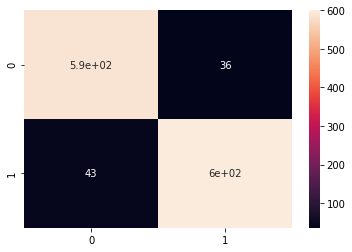

In [88]:
sns.heatmap(cf_matrix, annot=True)

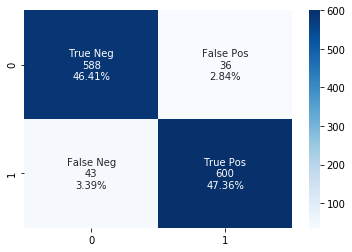

In [94]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')